In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
save_folder = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/updates/10_27_2020/laser_pzt_sweep/'
meas_dir = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements/laser_pzt_sweep/10_27_2020/'
plt.style.use('/Users/daniel_vander-hyde/Documents/git/my_python/matplotlib/stylelib/pptsize')

## Notes
- This simple notebook will take data that relates to the transverse mode spacing of the cavity we have in the lab and understand how the voltage impacts the laser frequency
- What is the [Hz]/[Volts] factor or function that dictates this?
- How to determine?
    - Frequency difference between the fundamental mode and the measured HG01 and the next fundamental mode
    - How to determine the mode spacing between the fundamental and the 00 mode?
        - Gouy phase shift will determine the higher order mode spacing
        - Then you can take the difference in freqeuncy between the fundamental mode and the HG10 mode
$$ \nu_{\mathrm{n,m}} = \nu_o + (\mathrm{n + m}) \delta \nu$$
        - All that matters is computing the second component of this 

In [2]:
#Cavity parameters
L = .165 #m
ROC1 = .33 #m
ROC2 = float('inf') #m
fracTM = .2486
FSR = 9.0846e8
FTM = FSR*fracTM
print(FTM)

225843156.0


In [3]:
## import measured data
tri_part = np.loadtxt(meas_dir + 'tri_wave_part_FSR.CSV', delimiter=',')
refl_part = np.loadtxt(meas_dir + 'REFL_part_FSR.CSV', delimiter=',')
tri_full = np.loadtxt(meas_dir + 'tri_wave_full_FSR.CSV', delimiter=',')
refl_full = np.loadtxt(meas_dir + 'REFL_full_FSR.CSV', delimiter=',')

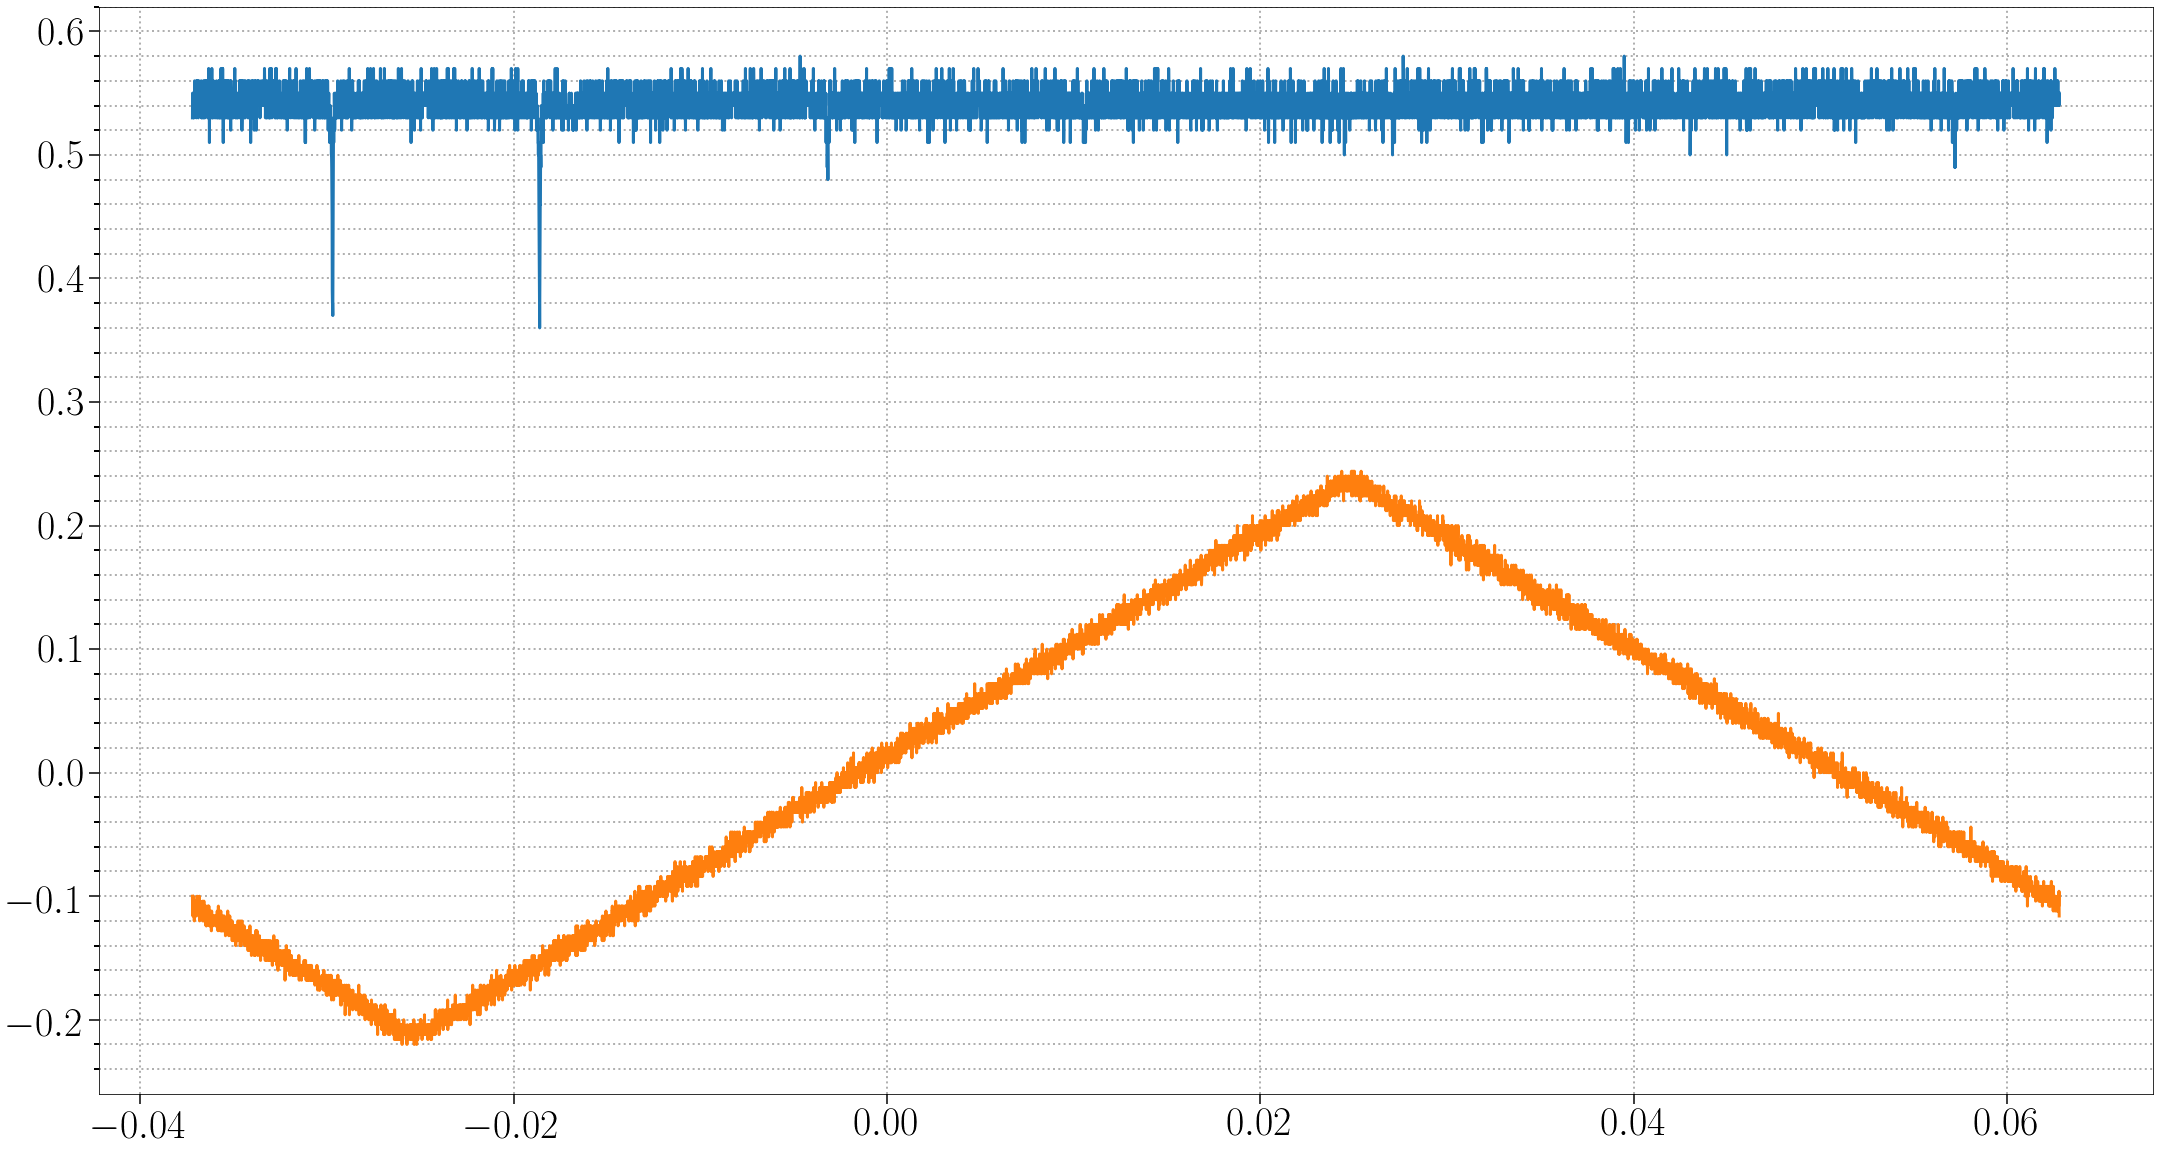

In [4]:
plt.plot(refl_part[:,0], refl_part[:,1])
plt.plot(tri_part[:,0], tri_part[:,1])

In [5]:
loc_min = sig.find_peaks(-1*refl_part[:,1], height=-.485)

In [6]:
loc_min

(array([ 752, 1860, 3404]), {'peak_heights': array([-0.37, -0.36, -0.48])})

In [7]:
diff = tri_part[loc_min[0][2],1]-tri_part[loc_min[0][1],1]

# Partial FSR

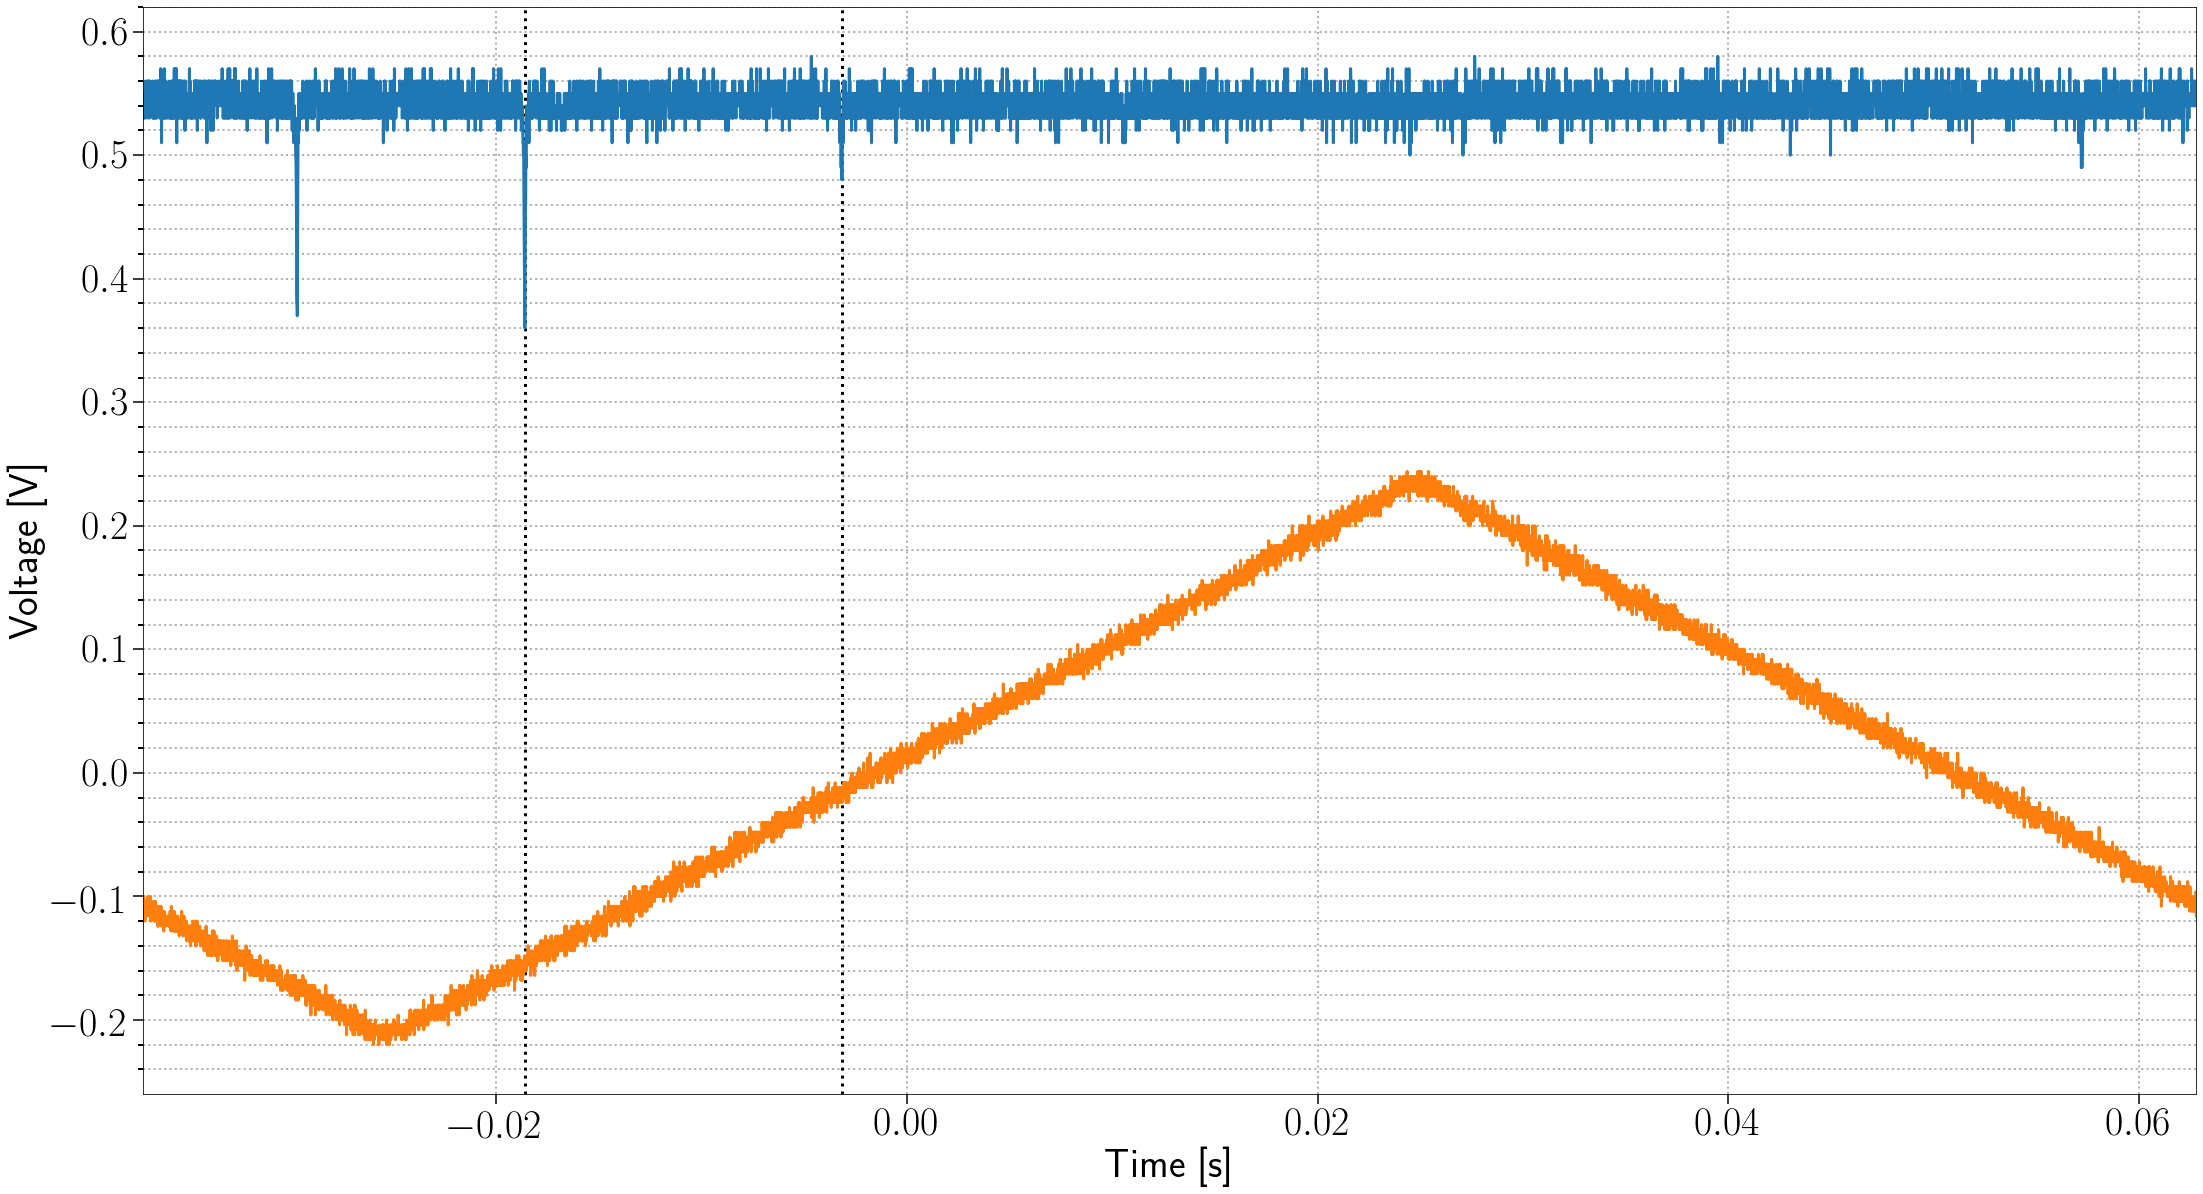

In [8]:
plt.plot(refl_part[:,0], refl_part[:,1])
plt.plot(tri_part[:,0], tri_part[:,1])
plt.vlines(tri_part[loc_min[0][1],0], -.26, .62, linestyles= 'dotted')
plt.vlines(tri_part[loc_min[0][2],0], -.26, .62, linestyles='dotted')
plt.ylim(-.26,.62)
plt.xlim(tri_part[0,0], tri_part[-1,0])
plt.ylabel('Voltage [V]')
plt.xlabel('Time [s]')
plt.savefig(save_folder+ 'part_FSR.png',dpi=300,bbox_inches='tight')

In [17]:
FTM/(diff*1e3)

1764399.65625

In [18]:
loc_min_2 = sig.find_peaks(-1*refl_full[:,1], height=-.495)

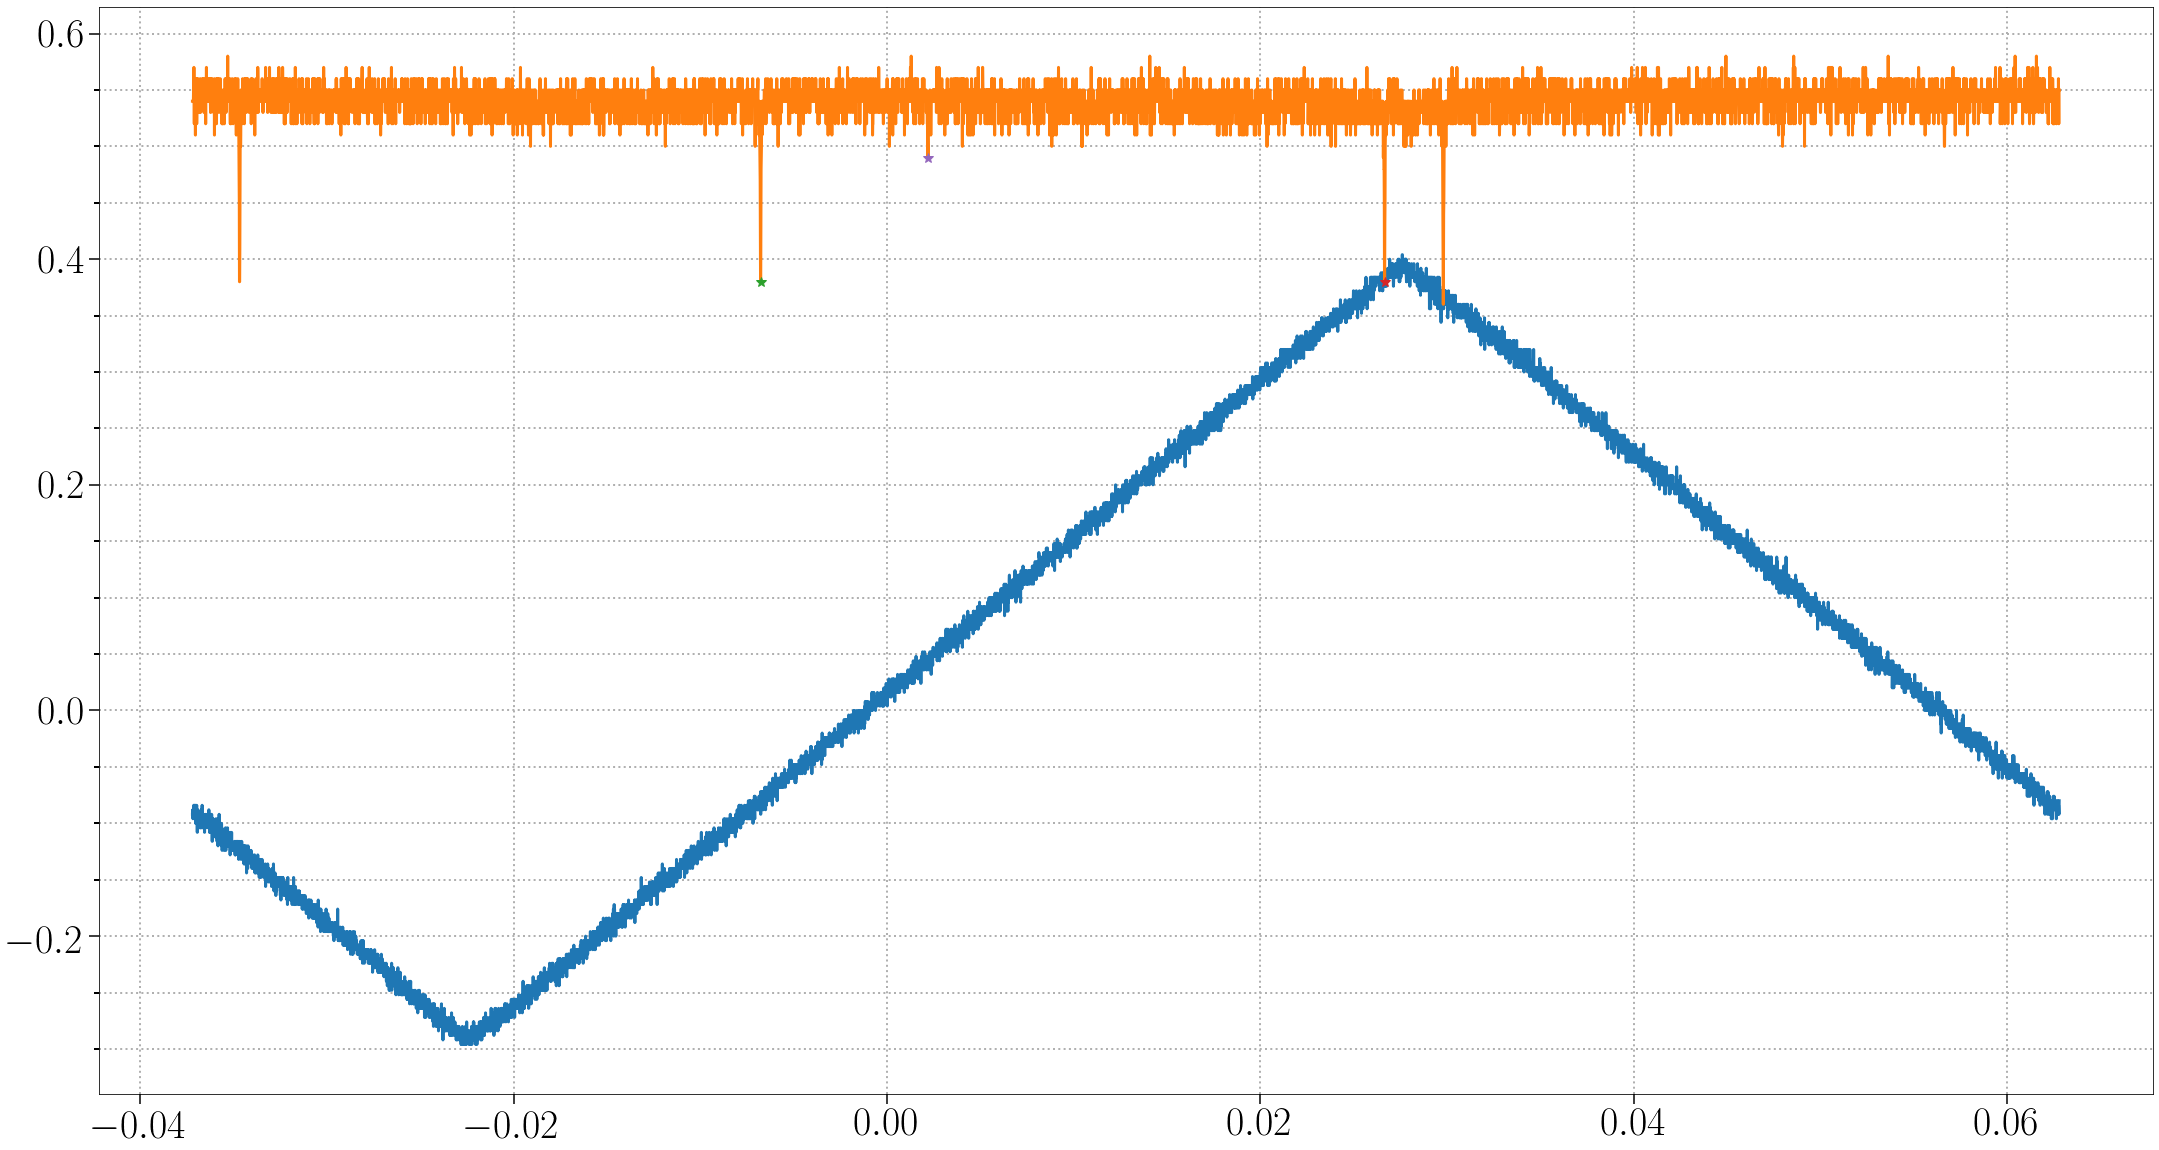

In [19]:
plt.plot(tri_full[:,0], tri_full[:,1])
plt.plot(refl_full[:,0], refl_full[:,1])
plt.plot(refl_full[:,0][loc_min_2[0][1]],refl_full[:,1][loc_min_2[0][1]], '*')
plt.plot(refl_full[:,0][loc_min_2[0][4]],refl_full[:,1][loc_min_2[0][4]], '*')
plt.plot(refl_full[:,0][loc_min_2[0][2]],refl_full[:,1][loc_min_2[0][2]],'*')


In [20]:
loc_min_2

(array([ 252, 3043, 3940, 6379, 6386, 6700]),
 {'peak_heights': array([-0.38, -0.38, -0.49, -0.49, -0.38, -0.36])})

In [21]:
FTM/((tri_full[:,1][loc_min_2[0][2]]-tri_full[:,1][loc_min_2[0][1]])*1e3)

1946923.7586206899

In [22]:
FSR/((tri_full[:,1][loc_min_2[0][4]]-tri_full[:,1][loc_min_2[0][1]])*1e3)

2009867.2566371681

# Full FSR

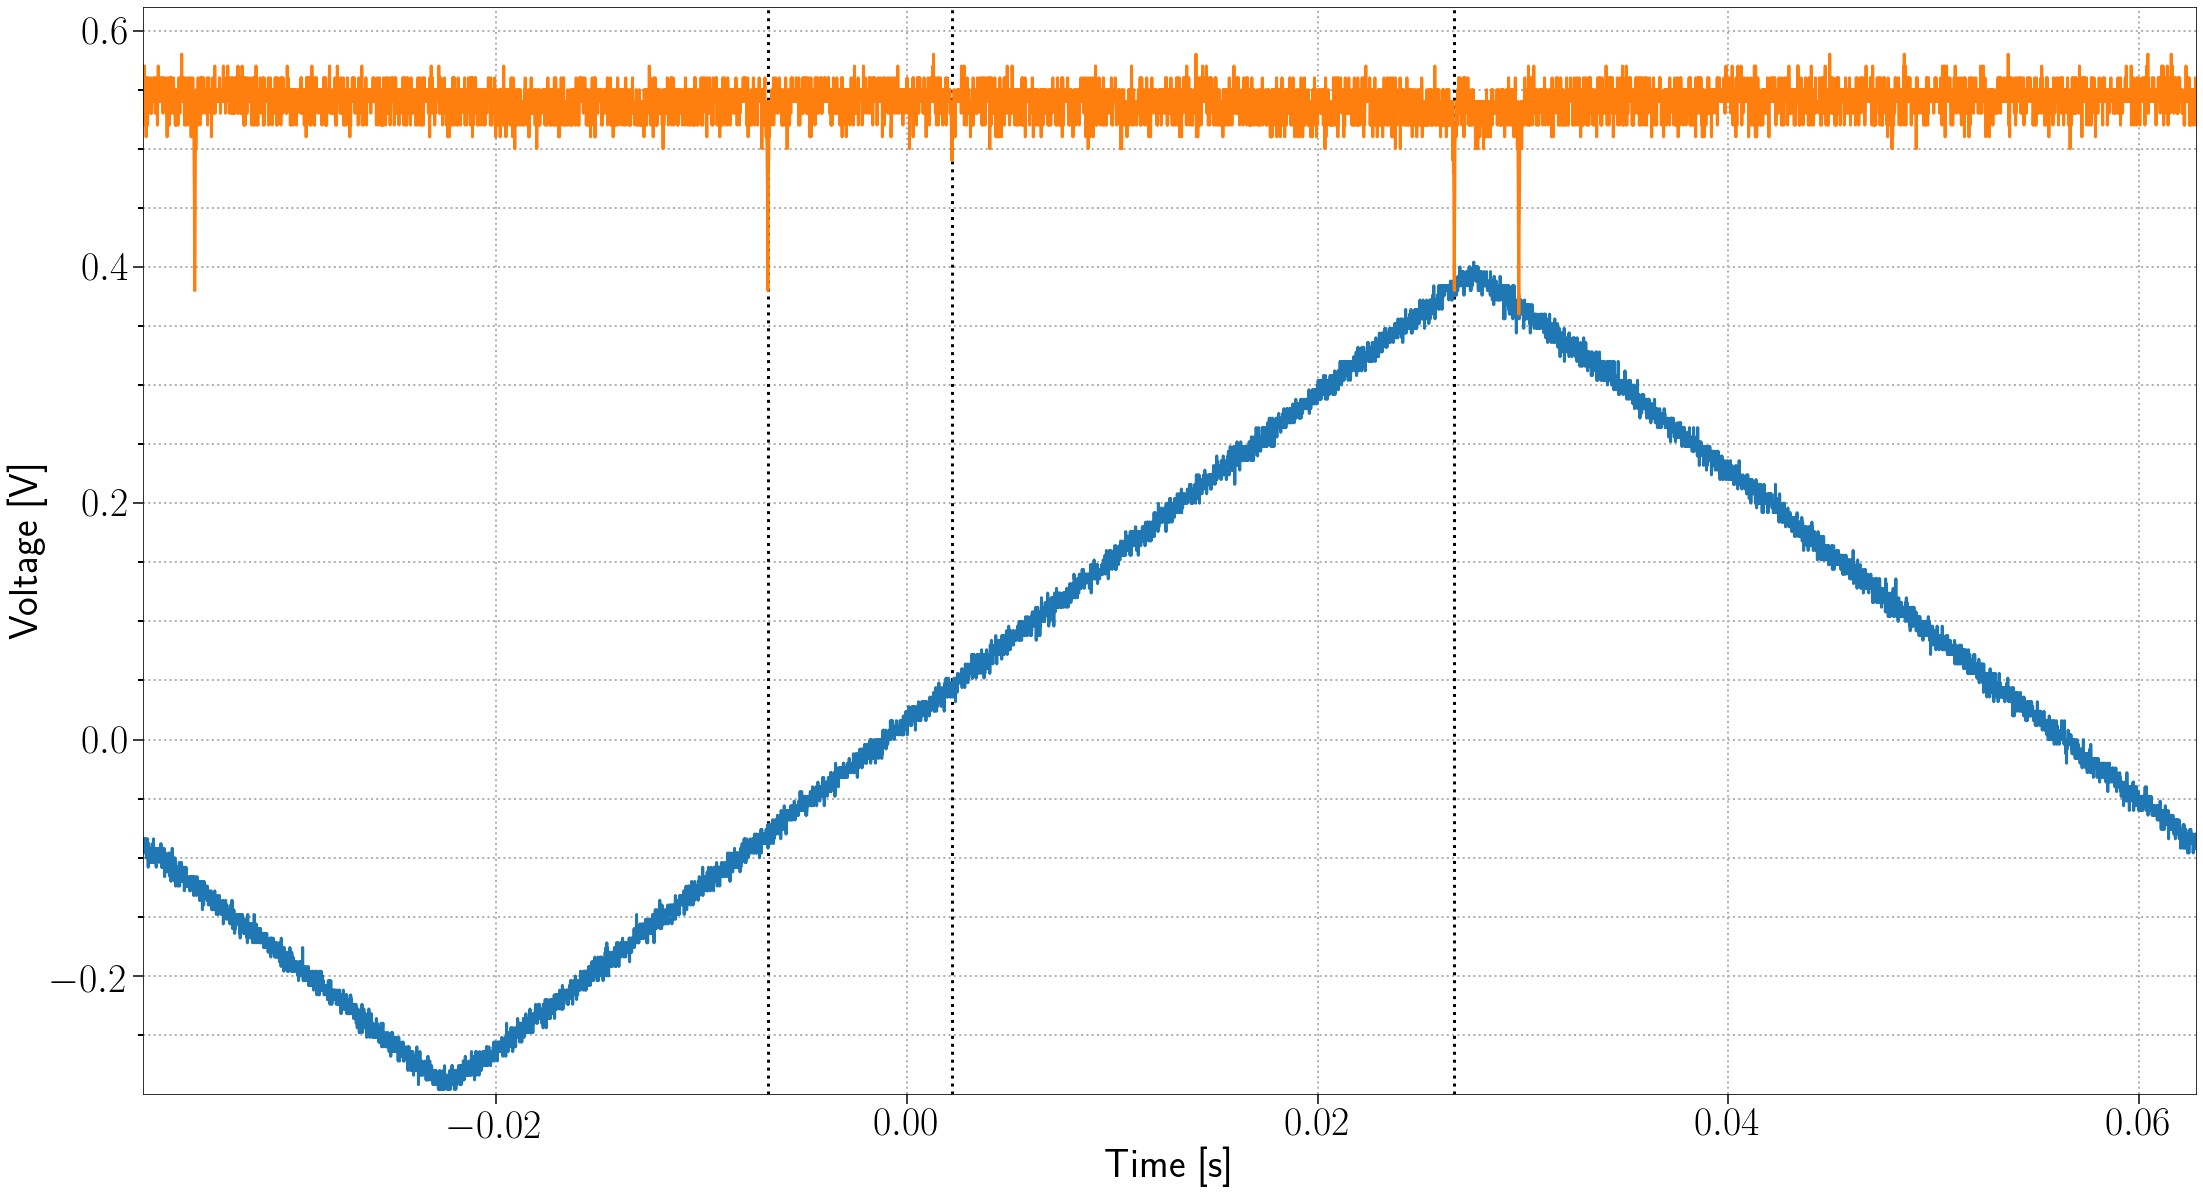

In [23]:
plt.plot(tri_full[:,0], tri_full[:,1])
plt.plot(refl_full[:,0], refl_full[:,1])
plt.vlines(tri_full[loc_min_2[0][1],0], -.3, .62, linestyles= 'dotted')
plt.vlines(tri_part[loc_min_2[0][2],0], -.3, .62, linestyles='dotted')
plt.vlines(tri_part[loc_min_2[0][4],0], -.3, .62, linestyles='dotted')
plt.ylim(-.3,.62)
plt.xlim(tri_part[0,0], tri_part[-1,0])
plt.ylabel('Voltage [V]')
plt.xlabel('Time [s]')
plt.savefig(save_folder + 'full_FSR.png',dpi=300,bbox_inches='tight')